---
title: Dimensionality Reduction
bibliography: ../citations.bib
---

In this section, I will be conducting dimensionality reduct in order to reduce the number of features in the NSDUH dataset [@nsduh]. Even after extensive data cleaning and removing nearly half of the features in the NSDUH dataset, there are still about 1700 features left. This is an unmanageable number of features for this task, so I will be exploring dimensionality reduction techniques to reduce the number of features.

## Project Project Proposal

### Dimensionality Reduction Overview
First, I will be conducting Principle Component Analysis (PCA) to reduce the number of features. PCA does dimensionality reduction by finding the eigenvectors of the covariance matrix. I will select the principle components that explain the largest amount of variance in the data.

Next, I will be conducting feature selection using t-distributed stochastic neighbor embedding (t-SNE). t-SNE is a non-linear dimensionality reduction technique that works by minimizing the divergence between two distributions: a distribution that measures pairwise similarities of the input data points and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedded space. I will select the features that are most important for the t-SNE embedding.

Finally, I will compare the results of the two methods and select the features that are most important for both methods.

### Tools
In order to perform dimensionality reduction, I will be using the following tools:

- Python
- scikit-learn
- pandas
- numpy
- matplotlib
- seaborn


## Code Implementation

Let's start implementing these dimensionality reduction techniques!

### Principle Component Analysis (PCA)

We will begin with PCA. First, we will import the necessary libraries and load the data.

In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
nsduh = pd.read_csv('../../data/clean_data/nsduh_2021.csv')

/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_8509/3212366654.py:8: DtypeWarning: Columns (5,11,57,58,60,501,513,514,515,516,517,519,520,521,522,523,541,546,550,551,552,553,563,569,570,571,856,857,858,859,860,861,862,863,864,865,866,867,868,1056,1057,1058,1061,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1250,1251,1252,1

Now, we can implement PCA on the NSDUH data. We will find conduct the PCA and use the `explained_variance_ratio_` attribute to see how much variance is explained by each principle component. We will test many different values for the number of principle components to see how many principle components we should use, and we will select the number of principle components that explain the most variance in the data.

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a copy of the data
nsduh_pca = nsduh.copy()

# Drop na values and target variable
nsduh_pca = nsduh_pca.dropna()
nsduh_pca = nsduh_pca.drop('smipppy', axis=1)

# Convert categorical variables to dummy variables
nsduh_pca = pd.get_dummies(nsduh_pca)

# Standardize the data
scaler = StandardScaler()
nsduh_pca = scaler.fit_transform(nsduh_pca)

/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

In [22]:
pca_data = []
pca = PCA(n_components=1000)
pca.fit(nsduh_pca)
print('Explained variance sum: {}'.format(pca.explained_variance_ratio_.sum()))

Explained variance sum: 0.5838283822929689


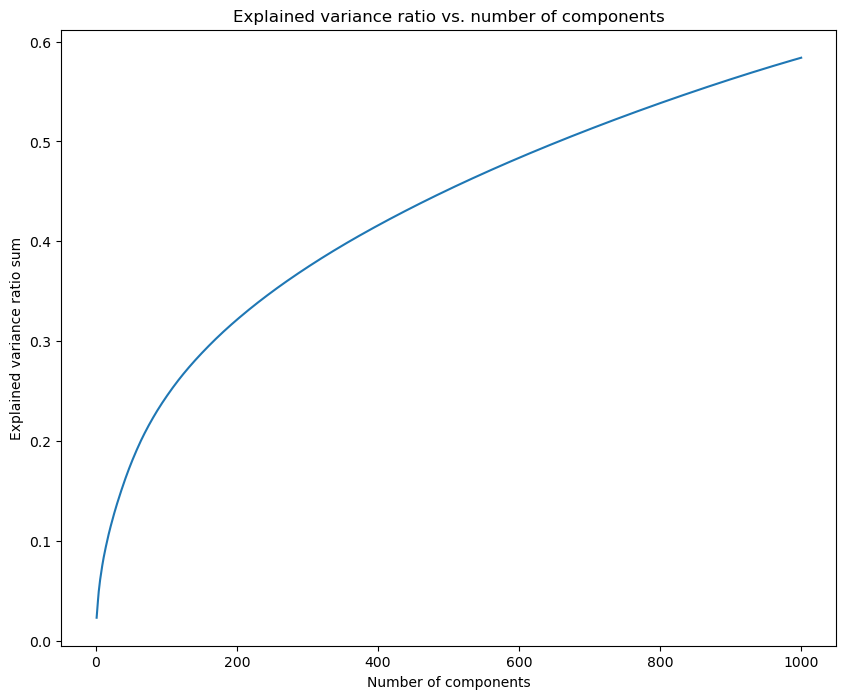

In [25]:
pca_data = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained_variance_ratio'])
pca_data['n_components'] = range(1, len(pca_data) + 1)

pca_data['explained_variance_ratio_sum'] = pca_data['explained_variance_ratio'].cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 8))
sns.lineplot(x='n_components', y='explained_variance_ratio_sum', data=pca_data)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio sum')
plt.title('Explained variance ratio vs. number of components')
plt.show()

Based on this graph of the additional amount of variance explained by each new principle component, we can see that the "elbow" of the graph is at around 150 principle components. This means that the first 150 principle components explain a large amount of the variance in the data (about 25%), with each additional principle component explaining a smaller amount of variance. Therefore, we will select the first 150 principle components to use in our analysis.

These principle components will only explain about 25% of the variance in the data, but this is still a significant amount of variance given that we are now using only 150 features instead of 1700 features.

In [6]:
pca = PCA(n_components=150)
pca_results = pca.fit_transform(nsduh_pca)

/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


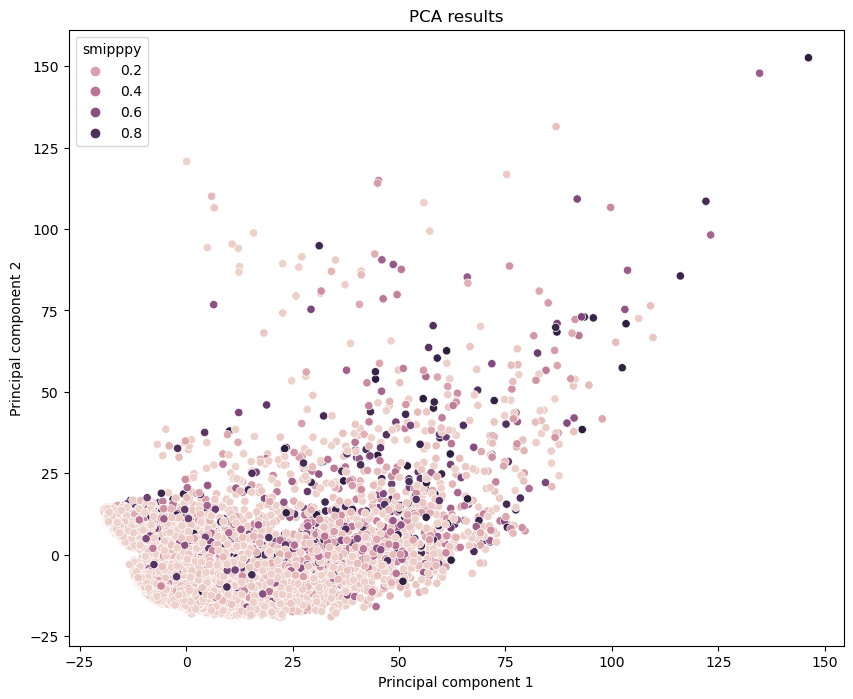

In [11]:
# Visualize PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=nsduh.dropna()['smipppy'])

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA results')
plt.show()

### T-Distributed Stochastic Neighbor Embedding (t-SNE)

Now, we will implement t-SNE. t-SNE is best used for compressing high-dimensional data into a low-dimensional space for visualization, and works best with less than 50 features. However, our data has about 1700 features, 

In [36]:
from sklearn.manifold import TSNE
from tqdm import tqdm

nsduh_tsne = nsduh_pca.copy()

perplexities = {}
for j in tqdm(range(5, 50, 5)):
    tsne = TSNE(n_components=2, perplexity=j, learning_rate='auto', init='random', random_state=87)
    X_embedded = tsne.fit_transform(nsduh_tsne)
    perplexities[j] = (X_embedded, tsne.kl_divergence_, tsne)
    print('Perplexity: {}'.format(j))
    print('KL divergence: {}'.format(tsne.kl_divergence_))

 11%|█         | 1/9 [06:06<48:49, 366.18s/it]

Perplexity: 5
KL divergence: 2.8341455459594727


 22%|██▏       | 2/9 [12:34<44:13, 379.14s/it]

Perplexity: 10
KL divergence: 2.8213579654693604


 33%|███▎      | 3/9 [19:24<39:20, 393.43s/it]

Perplexity: 15
KL divergence: 2.8338541984558105


 44%|████▍     | 4/9 [1:16:55<2:13:22, 1600.53s/it]

Perplexity: 20
KL divergence: 2.839709997177124


 56%|█████▌    | 5/9 [1:41:19<1:43:24, 1551.21s/it]

Perplexity: 25
KL divergence: 2.8464717864990234


 67%|██████▋   | 6/9 [1:51:43<1:01:47, 1235.76s/it]

Perplexity: 30
KL divergence: 2.8988637924194336


 78%|███████▊  | 7/9 [1:57:36<31:34, 947.30s/it]   

Perplexity: 35
KL divergence: 2.9204325675964355


 89%|████████▉ | 8/9 [2:03:54<12:46, 766.10s/it]

Perplexity: 40
KL divergence: 2.9536099433898926


100%|██████████| 9/9 [2:10:22<00:00, 869.15s/it]

Perplexity: 45
KL divergence: 2.9646353721618652


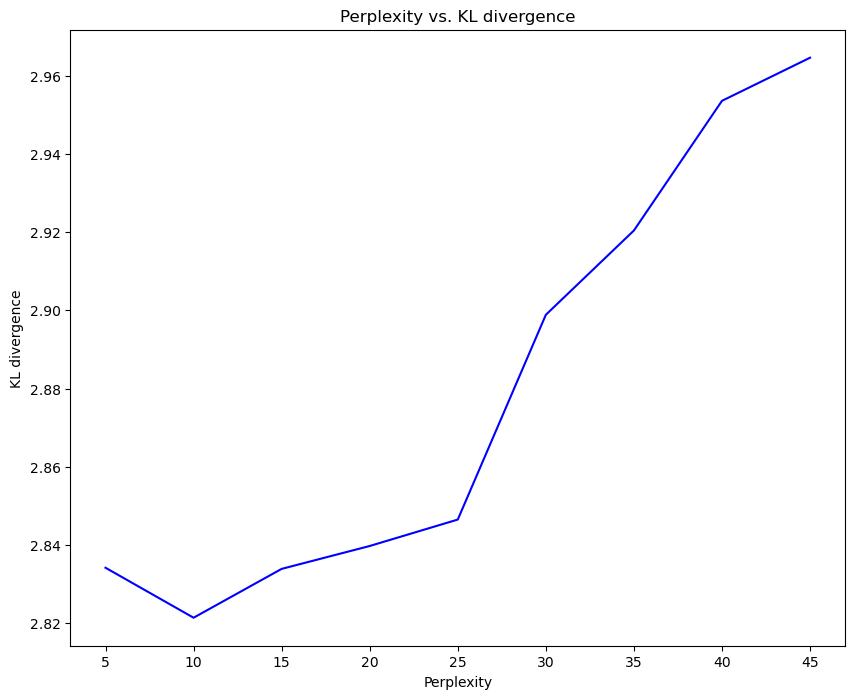

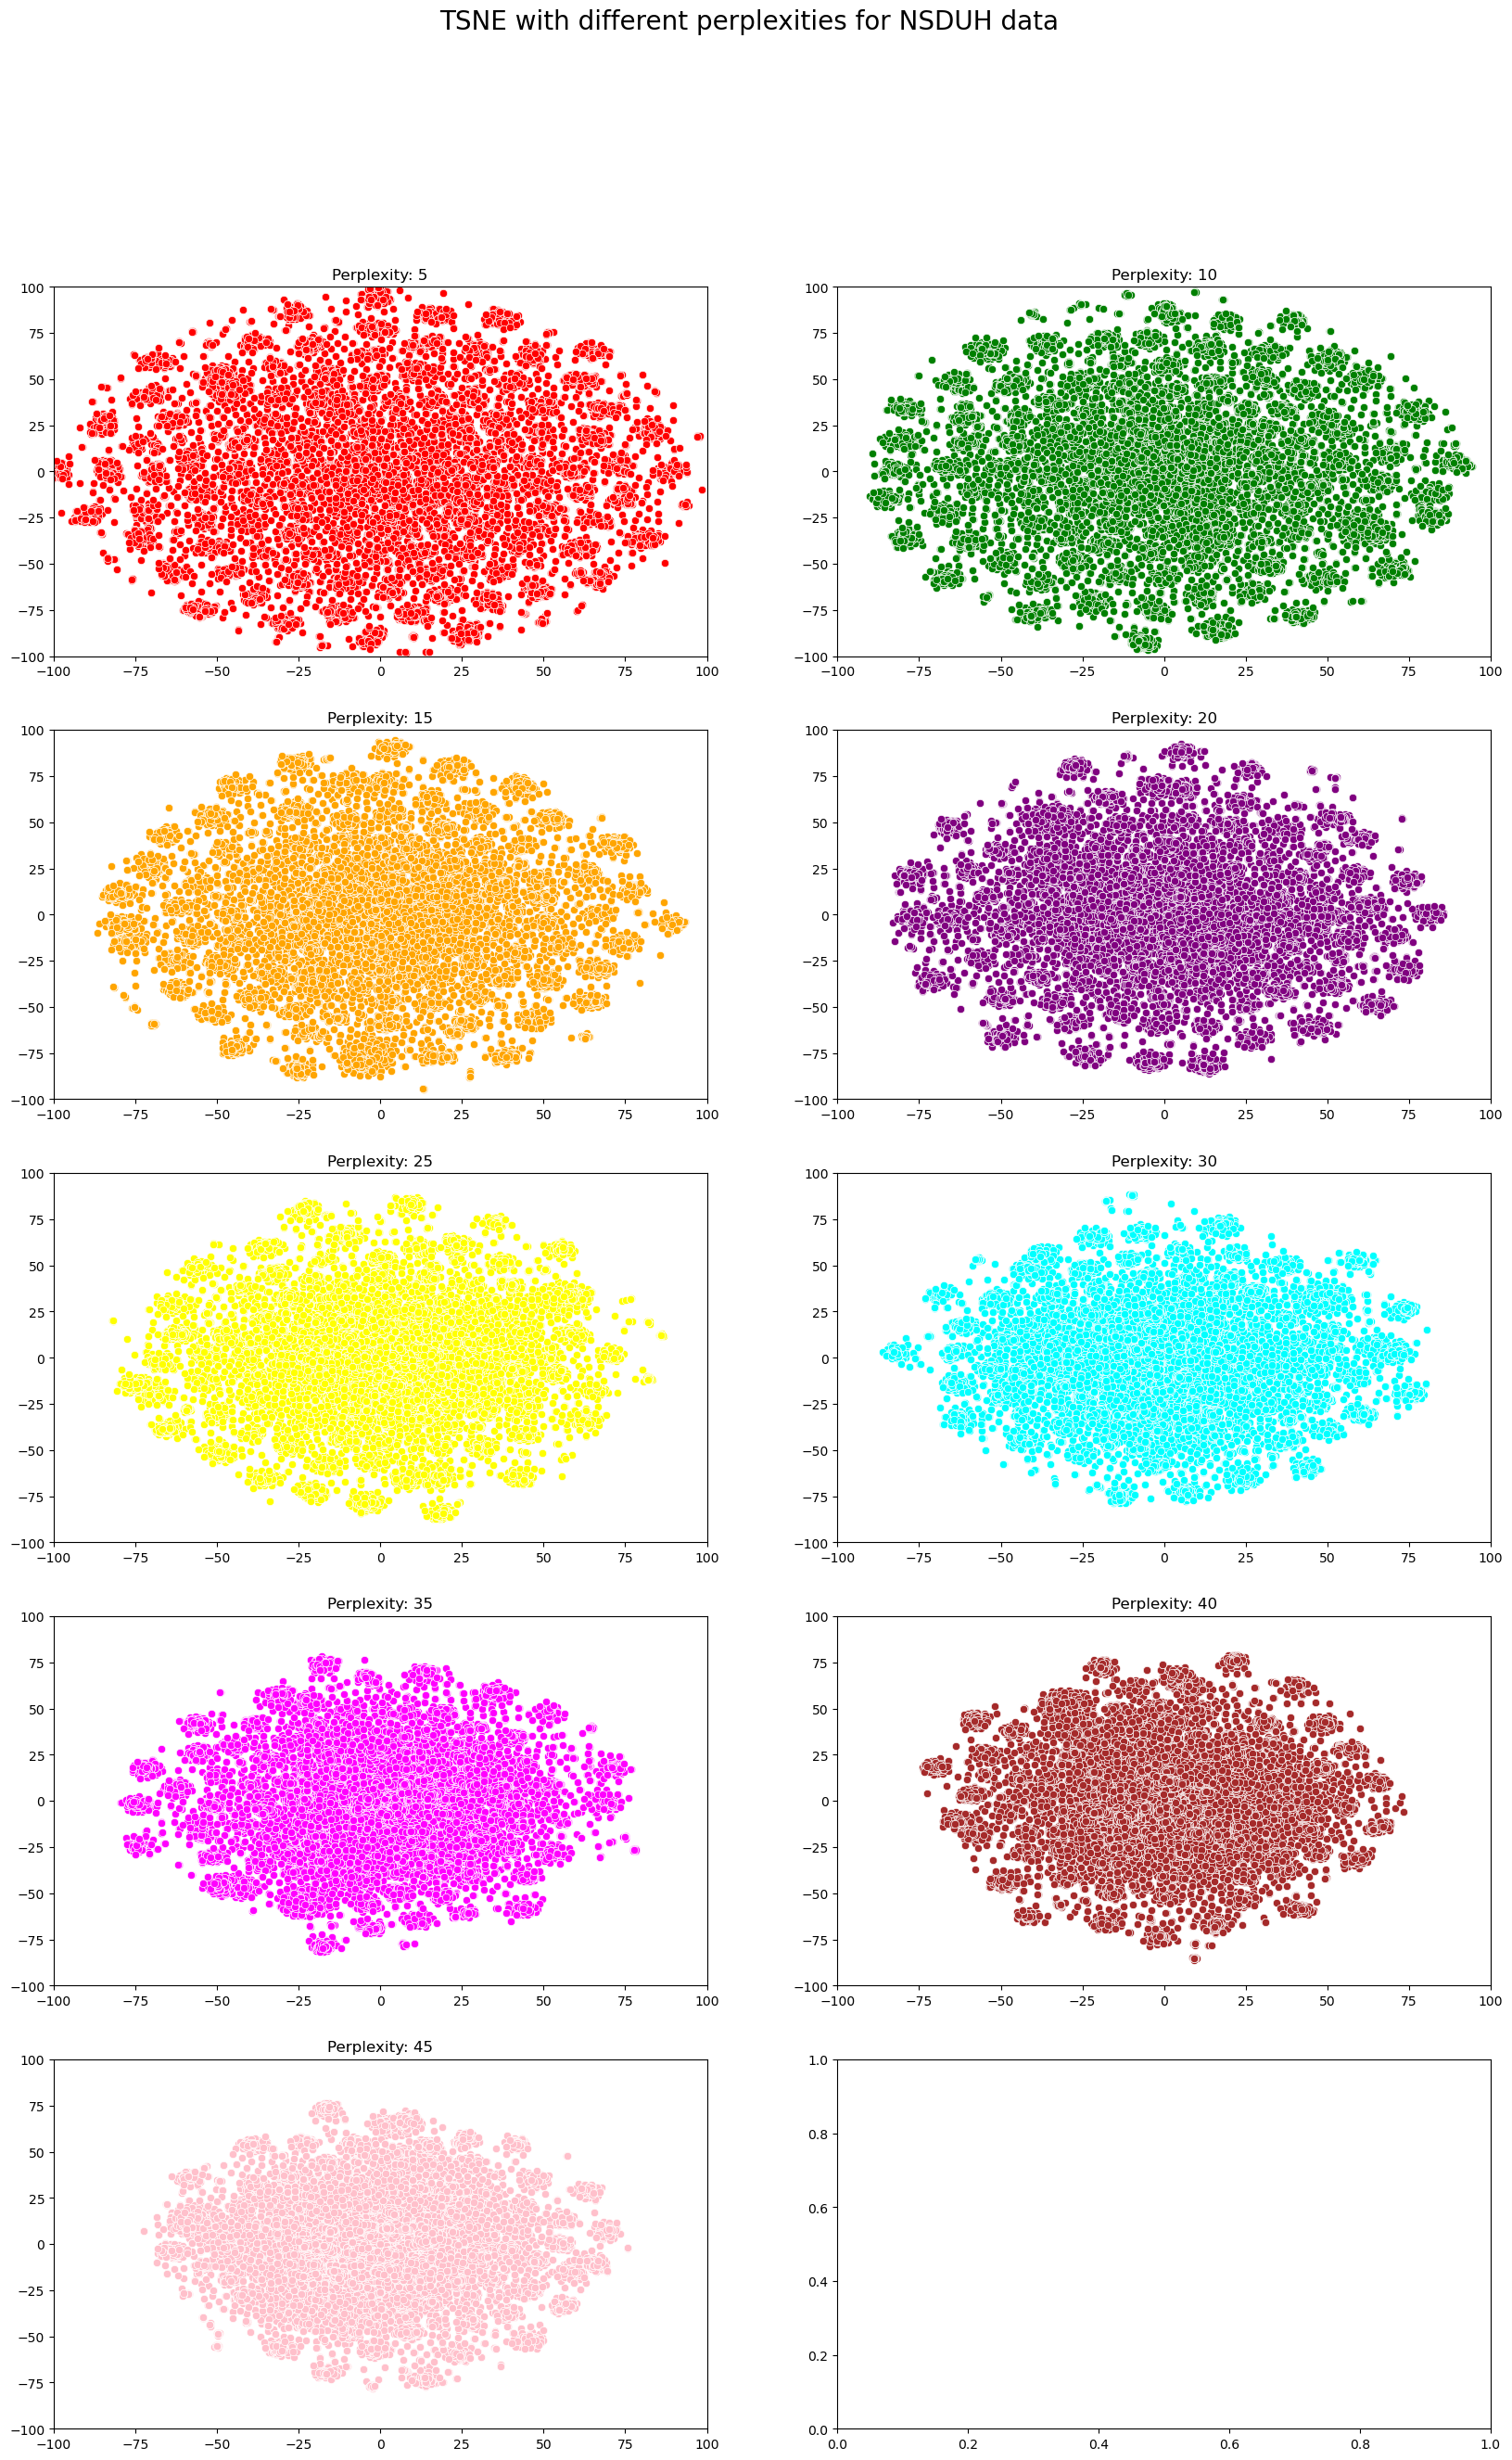

In [50]:
# Plot the perplexity vs. KL divergence
plt.figure(figsize=(10, 8))
sns.lineplot(x=list(perplexities.keys()), y=[i[1] for i in perplexities.values()], color='blue')
plt.xlabel('Perplexity')
plt.ylabel('KL divergence')
plt.title('Perplexity vs. KL divergence')
plt.show()

# Plot the X_embedded for each perplexity in its own subplot
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
plt.suptitle('TSNE with different perplexities for NSDUH data', fontsize=20)

axes = axes.flatten()
colors = ['red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'gray']
for i, j in enumerate(perplexities.keys()):
    sns.scatterplot(x=perplexities[j][0][:, 0], y=perplexities[j][0][:, 1], ax=axes[i], color=colors[i])
    axes[i].set_title('Perplexity: {}'.format(j))
    axes[i].set_xlim([-100, 100])  # Set the x-axis limits
    axes[i].set_ylim([-100, 100])  # Set the y-axis limits
plt.show()

Based on these plots of the t-SNE embedding, we can see that the optimal perplexity value is 10. When the perplexity value is 10, the KL divergence is minimized and the t-SNE embedding is most accurate. Our optimal KL divergence is about 2.8 which is very high, indicating that this is a poor t-SNE embedding.

Overall, we can say that t-SNE is not a very good choice for dimensionality reduction in this case. When we have such high dimensional data, we should rely on a different dimensionality reduction technique such as PCA.

In [26]:
pca_results[:, :50].shape

(22635, 50)

In [19]:
from sklearn.manifold import TSNE
from tqdm import tqdm

# Use the PCA results as input for t-SNE
nsduh_tsne = pca_results.copy()

perplexities_tsne = {}
for i in tqdm(range(10, 101, 10)):
    tsne = TSNE(n_components=2, perplexity=i, learning_rate='auto', init='random', random_state=87)
    X_embedded = tsne.fit_transform(nsduh_tsne)
    print('Perplexity: {}'.format(i))
    print('KL divergence: {}'.format(tsne.kl_divergence_))

    perplexities_tsne[i] = (X_embedded, tsne.kl_divergence_, tsne)

 10%|█         | 1/10 [01:59<17:53, 119.24s/it]

Perplexity: 10
KL divergence: 2.191544532775879


 20%|██        | 2/10 [04:03<16:15, 121.98s/it]

Perplexity: 20
KL divergence: 2.1266136169433594


 30%|███       | 3/10 [06:17<14:53, 127.70s/it]

Perplexity: 30
KL divergence: 2.0872268676757812


 40%|████      | 4/10 [08:39<13:20, 133.40s/it]

Perplexity: 40
KL divergence: 2.0713226795196533


 50%|█████     | 5/10 [11:04<11:27, 137.42s/it]

Perplexity: 50
KL divergence: 2.0573341846466064


 60%|██████    | 6/10 [13:30<09:21, 140.41s/it]

Perplexity: 60
KL divergence: 2.0417065620422363


 70%|███████   | 7/10 [16:03<07:13, 144.41s/it]

Perplexity: 70
KL divergence: 2.0197837352752686


 80%|████████  | 8/10 [18:33<04:52, 146.23s/it]

Perplexity: 80
KL divergence: 2.0085525512695312


 90%|█████████ | 9/10 [21:08<02:29, 149.10s/it]

Perplexity: 90
KL divergence: 1.9941091537475586


100%|██████████| 10/10 [23:51<00:00, 143.19s/it]

Perplexity: 100
KL divergence: 1.9927387237548828


/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

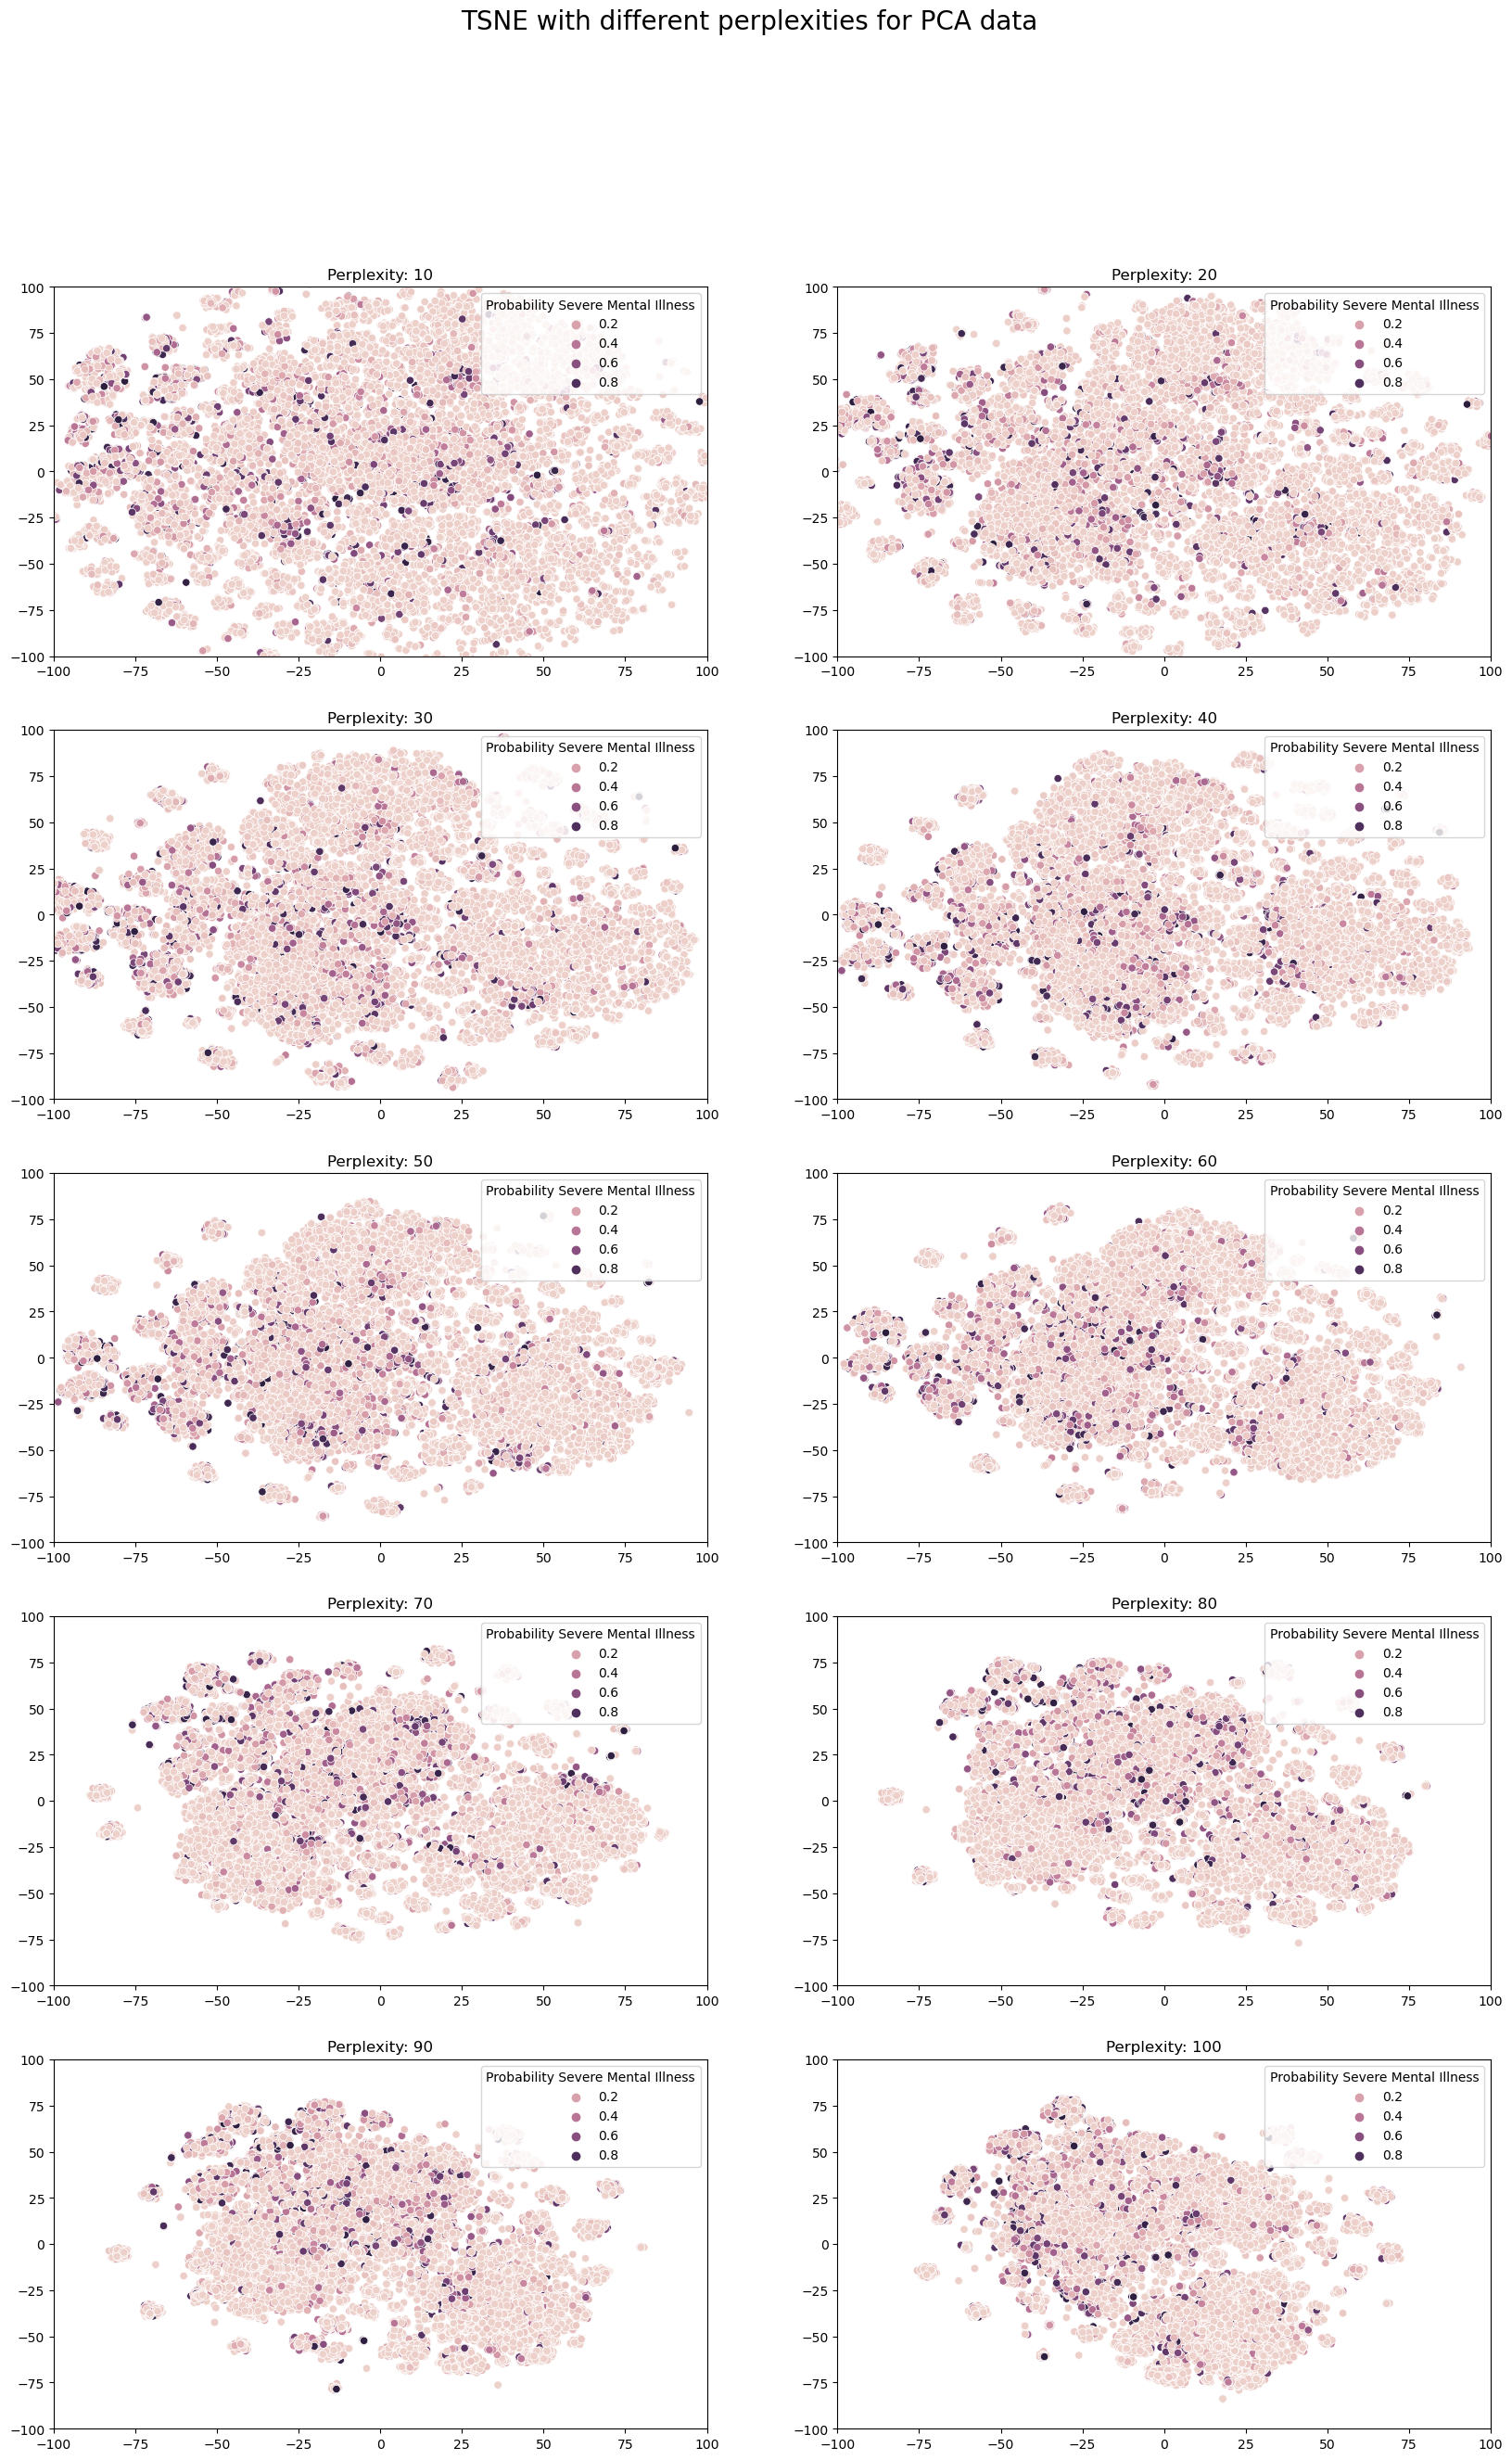

In [28]:
# Plot the X_embedded for each perplexity in its own subplot
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
plt.suptitle('TSNE with different perplexities for PCA data', fontsize=20)

axes = axes.flatten()
for i, j in enumerate(perplexities_tsne.keys()):
    sns.scatterplot(x=perplexities_tsne[j][0][:, 0], y=perplexities_tsne[j][0][:, 1], ax=axes[i], hue=nsduh.dropna()['smipppy'])
    axes[i].set_title('Perplexity: {}'.format(j))
    axes[i].set_xlim([-100, 100])  # Set the x-axis limits
    axes[i].set_ylim([-100, 100])  # Set the y-axis limits
    # set legend title
    axes[i].legend(title='Probability Severe Mental Illness', loc='upper right')
plt.show()

/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.5, 1.0, 'Perplexity vs. KL divergence')

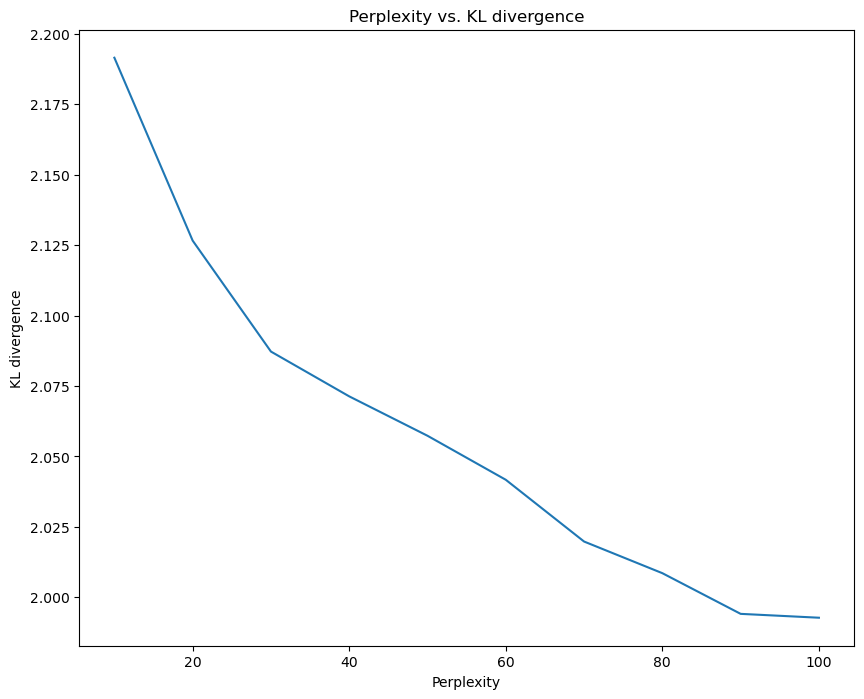

In [34]:
# Plot the KL divergence for different perplexity values
perplex_values = [i for i in perplexities_tsne.keys()]
kl_divergence = [i[1] for i in perplexities_tsne.values()]

plt.figure(figsize=(10, 8))
sns.lineplot(x=perplex_values, y=kl_divergence)
plt.xlabel('Perplexity')
plt.ylabel('KL divergence')
plt.title('Perplexity vs. KL divergence')

We can see from these plots that the t-SNE embeddings perform best when the perplexity value is 100, which minimizes our KL divergence. However, we see that our target variable, `smippy`, is not separated well using these embeddings, even after our PCA dimensionality reduction. We do see that some of the higher values for `smippy` are clustered together, indicating some small amount of separation. We also see some clustering that doesn't seem related to `smippy` but still provides valuable information. Overall, these embeddings do not separate the data well because of its high dimensionality.

The optimal perplexity is 100, but the KL divergence is still very high. Therefore, we will try t-SNE again using only the first 50 principle components from our PCA dimensionality reduction because t-SNE is optimal with 50 or less features.

In [27]:
pca_trimmed = pca_results[:, :50].copy()

perplexities_tsne_trimmed = {}
for i in tqdm(range(10, 101, 10)):
    tsne = TSNE(n_components=2, perplexity=i, learning_rate='auto', init='random', random_state=87)
    X_embedded = tsne.fit_transform(pca_trimmed)
    print('Perplexity: {}'.format(i))
    print('KL divergence: {}'.format(tsne.kl_divergence_))

    perplexities_tsne_trimmed[i] = (X_embedded, tsne.kl_divergence_, tsne)

 10%|█         | 1/10 [01:58<17:42, 118.04s/it]

Perplexity: 10
KL divergence: 1.8178658485412598


 20%|██        | 2/10 [03:54<15:37, 117.14s/it]

Perplexity: 20
KL divergence: 1.706322193145752


 30%|███       | 3/10 [05:43<13:12, 113.18s/it]

Perplexity: 30
KL divergence: 1.6597427129745483


 40%|████      | 4/10 [07:47<11:44, 117.49s/it]

Perplexity: 40
KL divergence: 1.6305937767028809


 50%|█████     | 5/10 [09:37<09:33, 114.78s/it]

Perplexity: 50
KL divergence: 1.6179404258728027


 60%|██████    | 6/10 [11:30<07:36, 114.18s/it]

Perplexity: 60
KL divergence: 1.597257375717163


 70%|███████   | 7/10 [13:30<05:48, 116.16s/it]

Perplexity: 70
KL divergence: 1.5813871622085571


 80%|████████  | 8/10 [15:34<03:57, 118.67s/it]

Perplexity: 80
KL divergence: 1.5653340816497803


 90%|█████████ | 9/10 [17:45<02:02, 122.62s/it]

Perplexity: 90
KL divergence: 1.5617610216140747


100%|██████████| 10/10 [20:00<00:00, 120.07s/it]

Perplexity: 100
KL divergence: 1.5542545318603516


/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

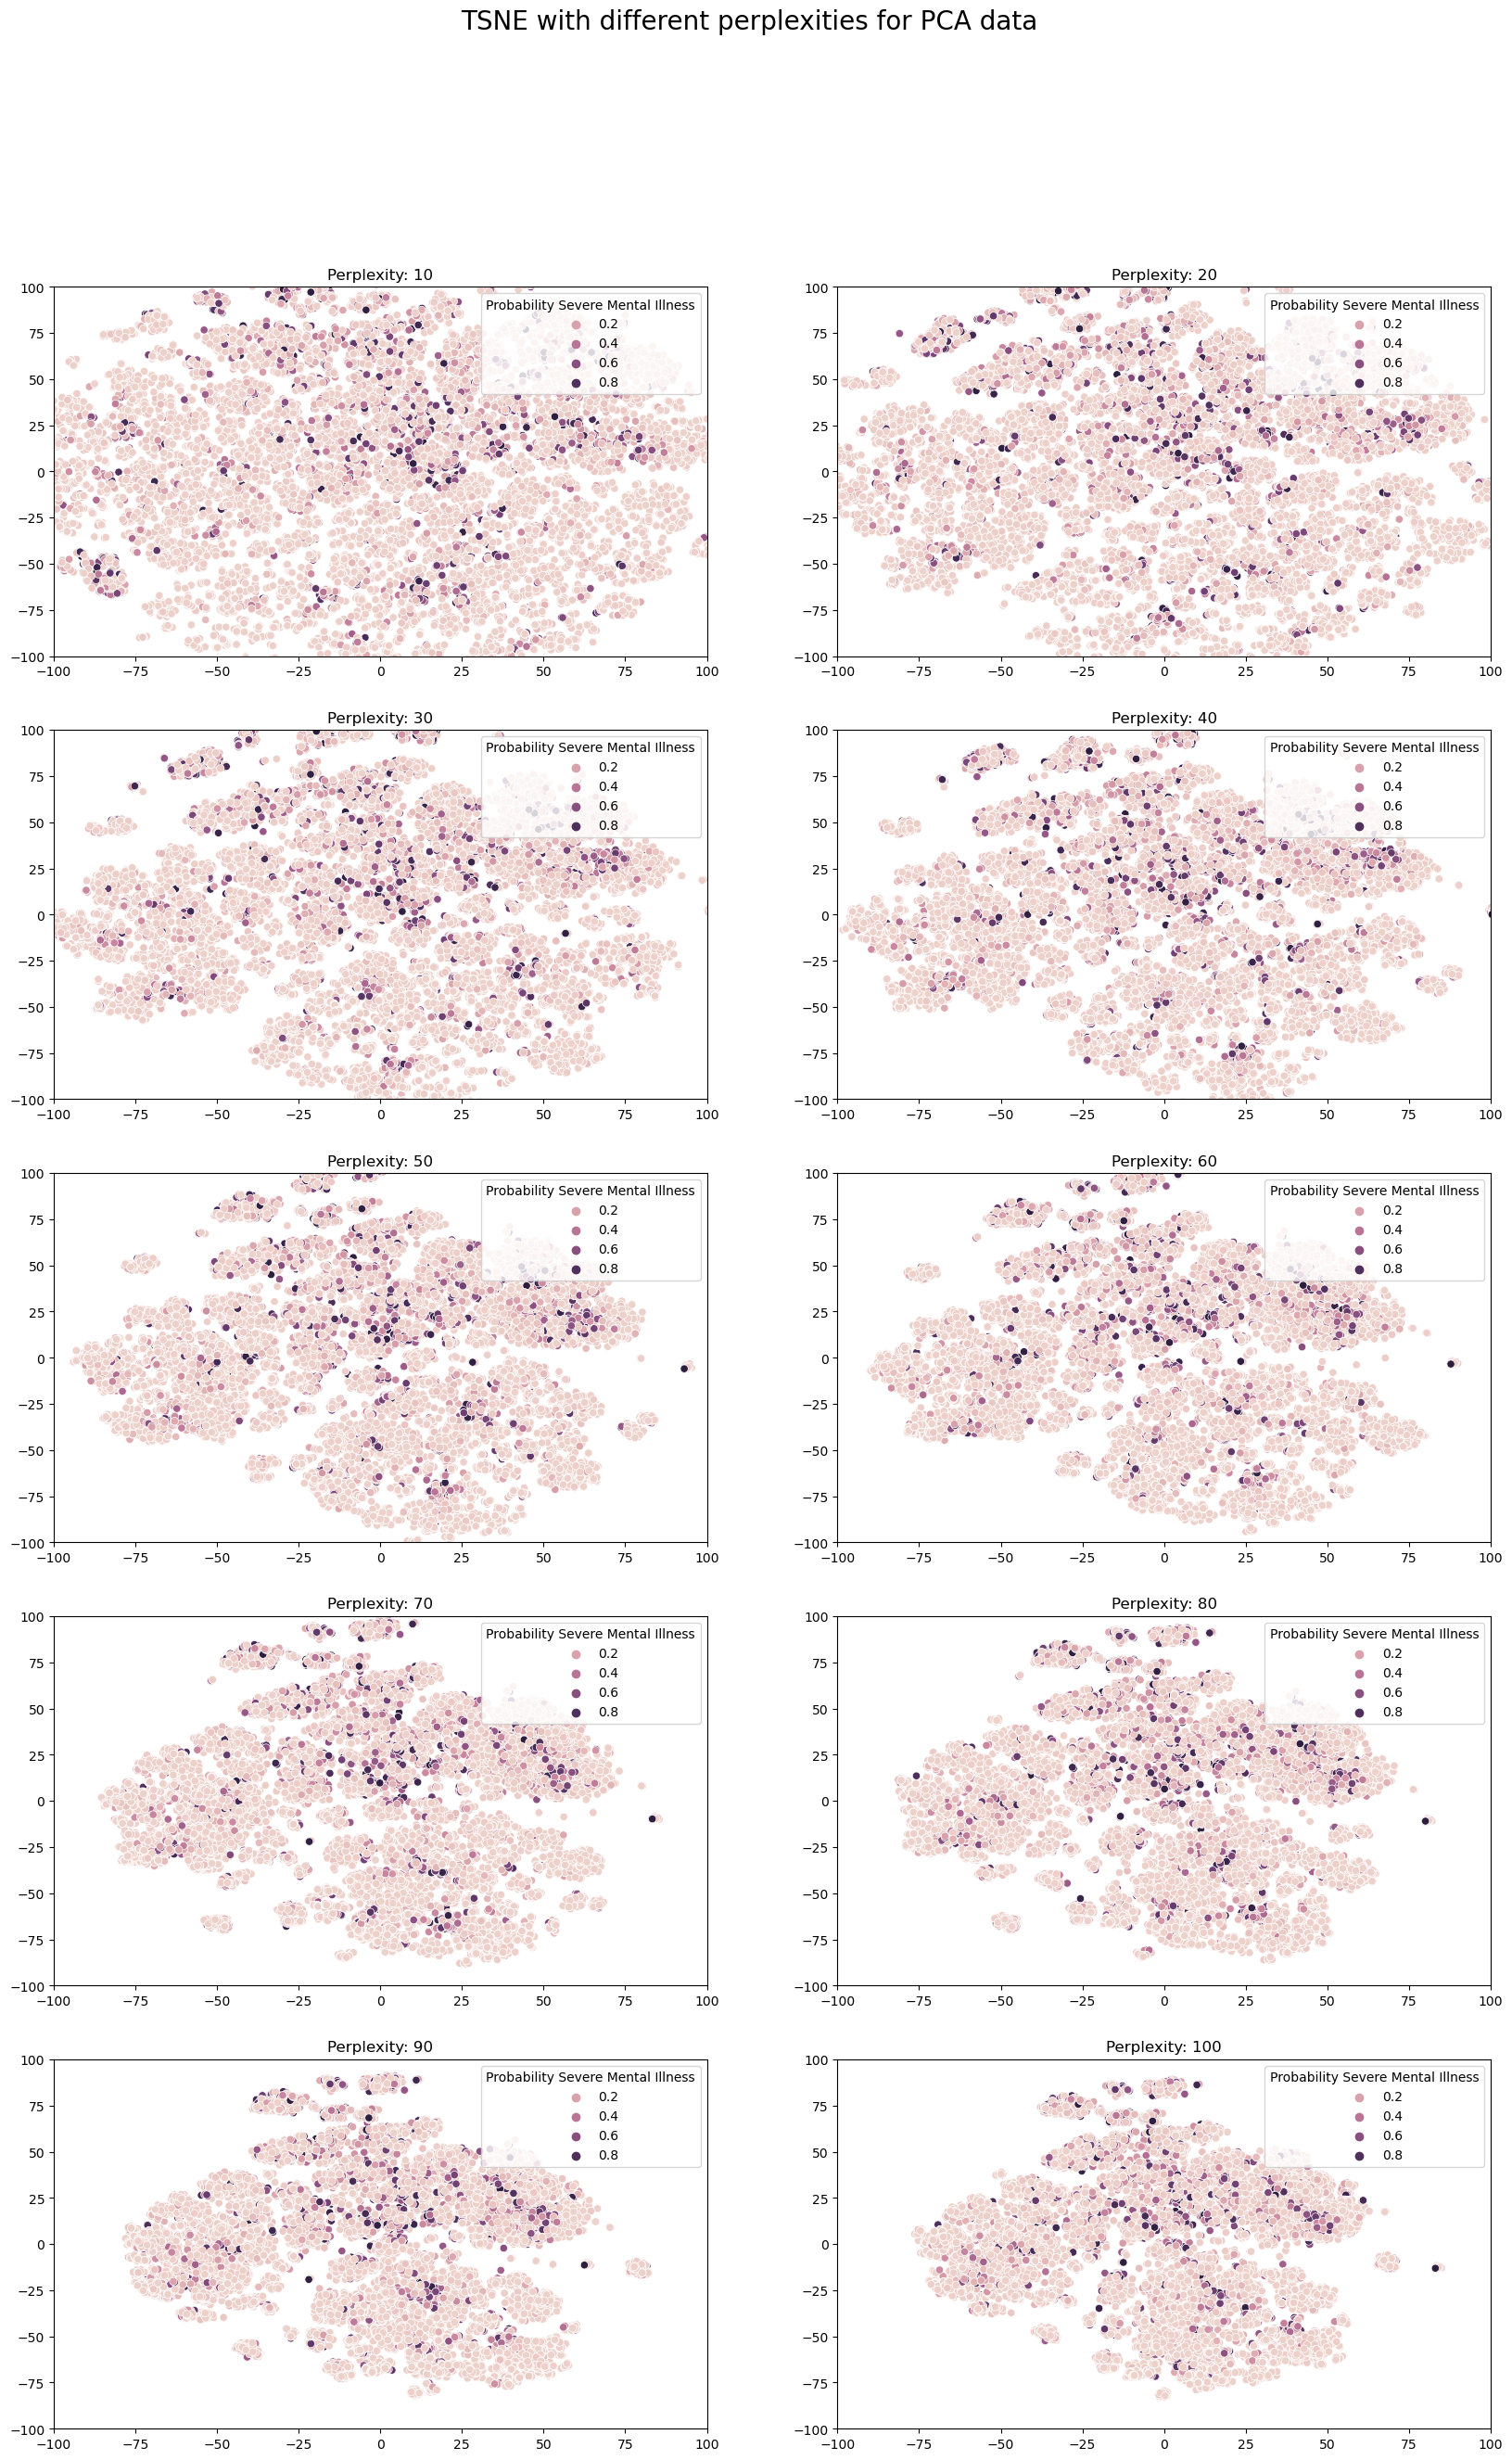

In [29]:
# Plot the X_embedded for each perplexity in its own subplot
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
plt.suptitle('TSNE with different perplexities for PCA data', fontsize=20)

axes = axes.flatten()
for i, j in enumerate(perplexities_tsne_trimmed.keys()):
    sns.scatterplot(x=perplexities_tsne_trimmed[j][0][:, 0], y=perplexities_tsne_trimmed[j][0][:, 1], ax=axes[i], hue=nsduh.dropna()['smipppy'])
    axes[i].set_title('Perplexity: {}'.format(j))
    axes[i].set_xlim([-100, 100])  # Set the x-axis limits
    axes[i].set_ylim([-100, 100])  # Set the y-axis limits
    # set legend title
    axes[i].legend(title='Probability Severe Mental Illness', loc='upper right')
plt.show()

/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariongeary/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.5, 1.0, 'Perplexity vs. KL divergence')

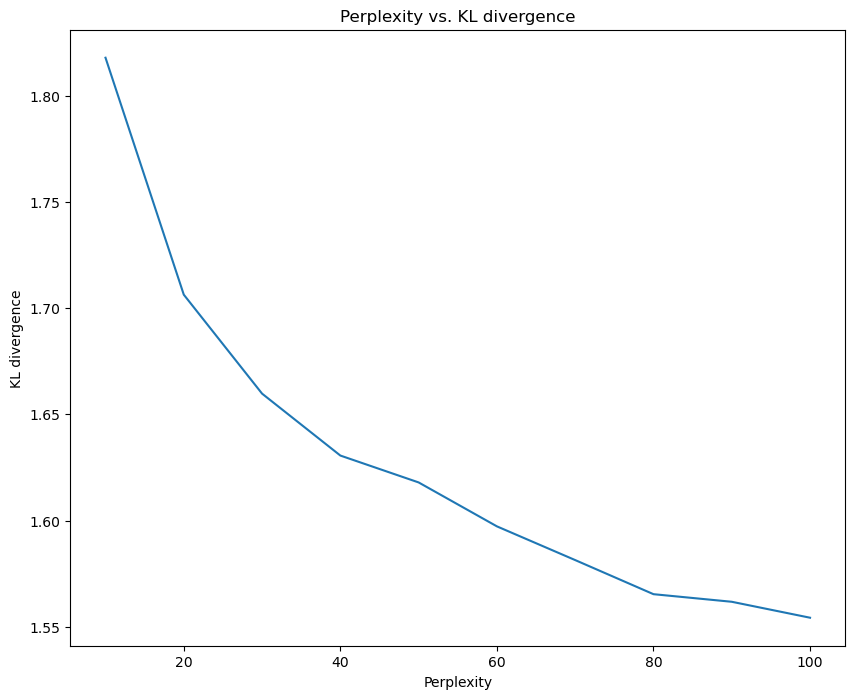

In [35]:
# Plot the KL divergence for different perplexity values
perplex_values = [i for i in perplexities_tsne_trimmed.keys()]
kl_divergence = [i[1] for i in perplexities_tsne_trimmed.values()]

plt.figure(figsize=(10, 8))
sns.lineplot(x=perplex_values, y=kl_divergence)
plt.xlabel('Perplexity')
plt.ylabel('KL divergence')
plt.title('Perplexity vs. KL divergence')

Using just the first 50 principle components, we can see a little more separation, but t-SNE generally appears to be a poor choice for dimensionality reduction in this case. We also see that a high perplexity is the best for minimizing our KL divergence, but it still remains relatively high at 1.5. However, this is the lowest KL divergence we have seen so far, meaning that t-SNE has worked best on the first 50 principle components of the NSDUH data.

## Evaluation and Comparison

Through this analysis, we see that PCA is a very effective means of reducting the dimensionality of this dataset. We were able to reduce the number of features from 1700 to 150 while still explaining about 25% of the variance in the data. This is a significant reduction in the number of features (about 10 times fewer features), and we can use these 150 principle components in our analysis.

For t-SNE, the results are less clear. First, we attempted to us t-SNE to reduce the dimensionality of the full NSDUH dataset. t-SNE struggled to provide any clear separability with this data. Next, we used t-SNE to attempt to further reduce the dimensionality of the principle components we obtained from PCA. This also did not provide any clear separability, though it performed slightly better than the full NSDUH dataset. Finally, we tried t-SNE on the first 50 principle components, which provided slightly better separability than the other two methods. However, we can still see that PCA is a much better choice for dimensionality reduction in this case. This is about as expected because t-SNE performs best with less than 50 features. Our data has very high dimensionality, so PCA is the best choice.